In [1]:
!pip install pandas numpy nltk scikit-learn transformers matplotlib seaborn


In [9]:
import pandas as pd

df = pd.read_csv("C:/Users/Binay/OneDrive/Desktop/Bootcamp/amazon/amazonreviews/Reviews.csv")

df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.head()

df.info()
print(df.head())  # Check if DataFrame exists

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dl

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [72]:
df = df[['Score', 'Text']].copy()  # Explicitly create a copy
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [74]:
pip install nltk


In [76]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Binay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Binay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Binay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
print(df.head())  # Check if DataFrame exists


   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


In [82]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(tokens)  # Rejoin words into a cleaned sentence

# Apply preprocessing to the "Text" column
df["Cleaned_Text"] = df["Text"].astype(str).apply(preprocess_text)

# Display cleaned text
print(df[["Text", "Cleaned_Text"]].head())


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        Cleaned_Text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around century light pillowy citrus...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  


In [16]:
print(df[["Text", "Cleaned_Text"]].head(10))


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   
5  I got a wild hair for taffy and ordered this f...   
6  This saltwater taffy had great flavors and was...   
7  This taffy is so good.  It is very soft and ch...   
8  Right now I'm mostly just sprouting this so my...   
9  This is a very healthy dog food. Good for thei...   

                                        Cleaned_Text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around century light pillowy citrus...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  
5  got wild hair taffy ordered five pound bag taf... 

In [24]:
print(df.columns)  # Check all available column names
print(df.head())   # Check first few rows to see if "Sentiment" exists


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Cleaned_Text'],
      dtype='object')
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                

In [86]:
def classify_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Score"].apply(classify_sentiment)  # Apply function
print(df[["Score", "Sentiment"]].head())  # Confirm it's created


   Score Sentiment
0      5  Positive
1      1  Negative
2      4  Positive
3      2  Negative
4      5  Positive


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 words
X = vectorizer.fit_transform(df["Cleaned_Text"])  # Convert text into features

# Define Target Labels
y = df["Sentiment"]  # Use the 'Sentiment' column

print("Feature Matrix Shape:", X.shape)  # Check shape


Feature Matrix Shape: (568454, 5000)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (454763, 5000)
Testing Set Shape: (113691, 5000)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=500)  # Increase iterations for better convergence

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate Model
print("✅ Model Training Complete!")
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Training Complete!
📊 Accuracy: 0.8663306682147224

🔍 Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.67      0.70     16181
     Neutral       0.51      0.18      0.27      8485
    Positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.72      0.61      0.63    113691
weighted avg       0.85      0.87      0.85    113691



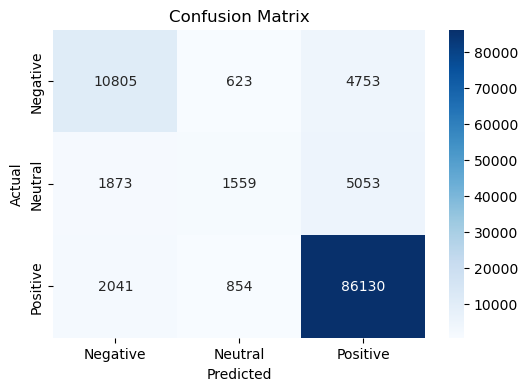

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


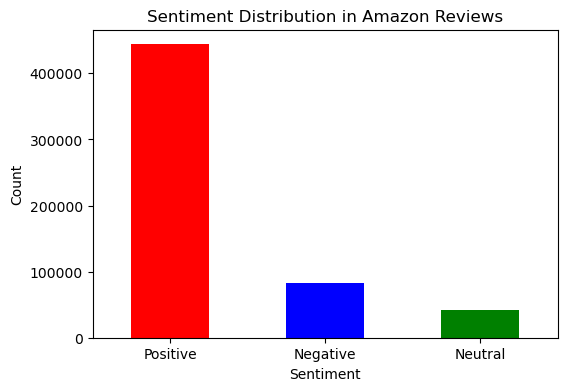

In [36]:
import matplotlib.pyplot as plt

# Count of Sentiments
sentiment_counts = df["Sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Amazon Reviews")
plt.xticks(rotation=0)
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Step 1: Sample only 20% of the dataset to reduce memory usage
df_sample = df.sample(frac=0.2, random_state=42)  # Use only 20% of data

# Step 2: Recreate feature matrix (X) and labels (y) for the sampled dataset
X_sample = vectorizer.fit_transform(df_sample["Cleaned_Text"])  # Convert text into features
y_sample = df_sample["Sentiment"]  # Labels

# Step 3: Split the data into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Step 4: Define hyperparameter tuning for logistic regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength values
    'solver': ['liblinear', 'lbfgs']
}

# Step 5: Initialize GridSearchCV with reduced data
log_reg = LogisticRegression(max_iter=500)
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=1)

# Step 6: Train GridSearch on the smaller dataset
grid_search.fit(X_train_sample, y_train_sample)

# Step 7: Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   1.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   1.1s
[CV] END ................................C=0.1, solver=lbfgs; total time=   1.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   1.1s
[CV] END ..............................C=1, solver=liblinear; total time=   2.0s
[CV] END ..............................C=1, solver=liblinear; total time=   1.8s
[CV] END ..............................C=1, solver=liblinear; total time=   1.8s
[CV] END ..................................C=1, solver=lbfgs; total time=   2.5s
[CV] END ..................................C=1, solver=lbfgs; total time=   3.1s
[CV] END ..................................C=1, s

In [42]:
# Train the final model with best parameters
final_model = LogisticRegression(C=1, solver='lbfgs', max_iter=500)
final_model.fit(X_train_sample, y_train_sample)

# Predict on test set
y_pred_final = final_model.predict(X_test_sample)

# Evaluate Final Model
from sklearn.metrics import accuracy_score, classification_report

print("✅ Final Model Trained!")
print("📊 Accuracy:", accuracy_score(y_test_sample, y_pred_final))
print("\n🔍 Classification Report:\n", classification_report(y_test_sample, y_pred_final))


✅ Final Model Trained!
📊 Accuracy: 0.8579093187915036

🔍 Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.62      0.68      3287
     Neutral       0.49      0.15      0.23      1722
    Positive       0.88      0.97      0.93     17730

    accuracy                           0.86     22739
   macro avg       0.71      0.58      0.61     22739
weighted avg       0.83      0.86      0.84     22739



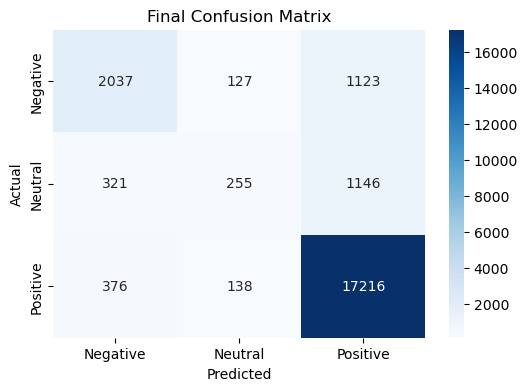

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm_final = confusion_matrix(y_test_sample, y_pred_final)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()


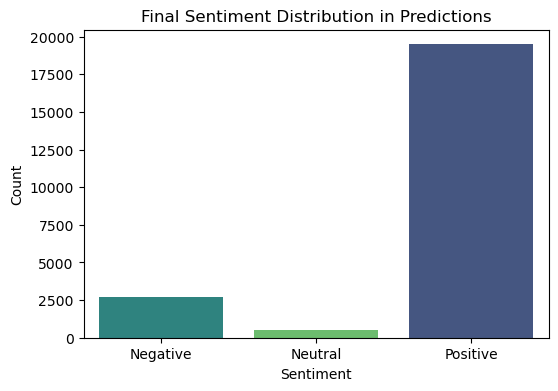

In [48]:
import pandas as pd

# Convert predictions into a DataFrame for visualization
df_results = pd.DataFrame({"Actual": y_test_sample, "Predicted": y_pred_final})

# Count plot for sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Predicted", data=df_results, hue="Predicted", palette="viridis", order=["Negative", "Neutral", "Positive"], legend=False)
plt.title("Final Sentiment Distribution in Predictions")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
